In [75]:
import pandas as pd
from sklearn import linear_model
import numpy as np
%matplotlib inline

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/williamcornejo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data Wrangling

In [4]:
df = df.drop(columns=['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING'])


In [5]:
avg_X = df['X'].astype('float').mean(axis=0)
#print("Average X:", avg_X)

In [6]:
df['X'].replace(np.nan, avg_X, inplace=True)

In [7]:
avg_Y = df['Y'].astype('float').mean(axis=0)
print("Average Y:", avg_Y)
df['Y'].replace(np.nan, avg_Y, inplace=True)

Average Y: 47.619542517688615


In [8]:
df['ADDRTYPE'].value_counts().idxmax()

'Block'

In [9]:
df["ADDRTYPE"].replace(np.nan, "Block", inplace=True)

In [10]:
df['LOCATION'].value_counts().idxmax()

'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N'

In [11]:
df["LOCATION"].replace(np.nan, "BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N", inplace=True)

In [12]:
df['COLLISIONTYPE'].value_counts().idxmax()

'Parked Car'

In [13]:
df["COLLISIONTYPE"].replace(np.nan, "Parked Car", inplace=True)

In [14]:
df['JUNCTIONTYPE'].value_counts().idxmax()

'Mid-Block (not related to intersection)'

In [15]:
df["JUNCTIONTYPE"].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)

In [16]:
df['UNDERINFL'].value_counts().idxmax()

'N'

In [17]:
df["UNDERINFL"].replace(np.nan, "N", inplace=True)

In [18]:
df["WEATHER"].value_counts().idxmax()

'Clear'

In [19]:
df["WEATHER"].replace(np.nan, "Clear", inplace=True)

In [20]:
df["ROADCOND"].value_counts().idxmax()

'Dry'

In [21]:
df["ROADCOND"].replace(np.nan, "Dry", inplace=True)

In [22]:
df["LIGHTCOND"].value_counts().idxmax()

'Daylight'

In [23]:
df["LIGHTCOND"].replace(np.nan, "Daylight", inplace=True)

In [24]:
df["SDOTCOLNUM"].value_counts().idxmax()
avg_SDOT = df['SDOTCOLNUM'].astype('float').mean(axis=0)
print("Average SDOT:", avg_SDOT)
df['SDOTCOLNUM'].replace(np.nan, avg_SDOT, inplace=True)

Average SDOT: 7972521.3371441495


In [25]:

df['ST_COLCODE'].replace(np.nan, 32, inplace=True)

df['ST_COLDESC'].replace(np.nan, 'One parked--one moving', inplace=True)

In [26]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

LOCATION
False    194673
Name: LOCATION, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    194673
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int

In [28]:
print(df.shape)
print(df.columns)
df['SEVERITYCODE'].value_counts()

(194673, 32)
Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOTCOLNUM',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [29]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
LOCATION           object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SDOTCOLNUM        float64
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [30]:
df2 = df[['SEVERITYCODE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 
          'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'SEVERITYDESC']]
df2.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,SEVERITYDESC
0,2,Angles,At Intersection (intersection related),N,Overcast,Wet,Daylight,Intersection,Injury Collision
1,1,Sideswipe,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,Block,Property Damage Only Collision
2,1,Parked Car,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,Block,Property Damage Only Collision
3,1,Other,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,Block,Property Damage Only Collision
4,2,Angles,At Intersection (intersection related),0,Raining,Wet,Daylight,Intersection,Injury Collision


In [31]:
dummy_variable_1 = pd.get_dummies(df2["SEVERITYDESC"])
dummy_variable_1.head()
df2 = pd.concat([df2, dummy_variable_1], axis=1)

In [32]:
df2.drop("SEVERITYDESC", axis = 1, inplace=True)
df2.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,Injury Collision,Property Damage Only Collision
0,2,Angles,At Intersection (intersection related),N,Overcast,Wet,Daylight,Intersection,1,0
1,1,Sideswipe,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,Block,0,1
2,1,Parked Car,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,Block,0,1
3,1,Other,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,Block,0,1
4,2,Angles,At Intersection (intersection related),0,Raining,Wet,Daylight,Intersection,1,0


In [33]:
dummy_variable_2 = pd.get_dummies(df["ADDRTYPE"])
dummy_variable_2.head()

,Alley,Block,Intersection
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [34]:
df2 = pd.concat([df2, dummy_variable_2], axis=1)
df2

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,Injury Collision,Property Damage Only Collision,Alley,Block,Intersection
0,2,Angles,At Intersection (intersection related),N,Overcast,Wet,Daylight,Intersection,1,0,0,0,1
1,1,Sideswipe,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,Block,0,1,0,1,0
2,1,Parked Car,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,Block,0,1,0,1,0
3,1,Other,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,Block,0,1,0,1,0
4,2,Angles,At Intersection (intersection related),0,Raining,Wet,Daylight,Intersection,1,0,0,0,1
5,1,Angles,At Intersection (intersection related),N,Clear,Dry,Daylight,Intersection,0,1,0,0,1
6,1,Angles,At Intersection (intersection related),0,Raining,Wet,Daylight,Intersection,0,1,0,0,1
7,2,Cycles,At Intersection (intersection related),N,Clear,Dry,Daylight,Intersection,1,0,0,0,1
8,1,Parked Car,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,Block,0,1,0,1,0
9,2,Angles,At Intersection (intersection related),0,Clear,Dry,Daylight,Intersection,1,0,0,0,1


In [35]:
df2['UNDERINFL'].value_counts()

N    105158
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [36]:

dummy_variable_3 = pd.get_dummies(df["COLLISIONTYPE"])
dummy_variable_3.drop("Other", axis=1, inplace=True)
dummy_variable_3.drop("Pedestrian", axis=1, inplace=True)
dummy_variable_3.drop("Cycles", axis=1, inplace=True)
dummy_variable_3.rename(columns={'Angles':'Angles Collision', 'Head On':'Head On Collision',
'Left Turn': 'Left Turn Collision', 'Parked Car': 'Parked Car Involved',
'Rear Ended': 'Car Rear Ended','Right Turn': 'Right Turn Collision', 'Sideswipe': 'Sideswipe Collision'}, inplace=True)
dummy_variable_3.head()

,Angles Collision,Head On Collision,Left Turn Collision,Parked Car Involved,Car Rear Ended,Right Turn Collision,Sideswipe Collision
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [37]:
df2 = pd.concat([df2, dummy_variable_3], axis=1)
df2.drop("COLLISIONTYPE", axis = 1, inplace=True)
df2.head()

,SEVERITYCODE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,Injury Collision,Property Damage Only Collision,Alley,Block,Intersection,Angles Collision,Head On Collision,Left Turn Collision,Parked Car Involved,Car Rear Ended,Right Turn Collision,Sideswipe Collision
0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,Intersection,1,0,0,0,1,1,0,0,0,0,0,0
1,1,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,Block,0,1,0,1,0,0,0,0,0,0,0,1
2,1,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,Block,0,1,0,1,0,0,0,0,1,0,0,0
3,1,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,Block,0,1,0,1,0,0,0,0,0,0,0,0
4,2,At Intersection (intersection related),0,Raining,Wet,Daylight,Intersection,1,0,0,0,1,1,0,0,0,0,0,0


In [38]:
dummy_variable_4 = pd.get_dummies(df["JUNCTIONTYPE"])
dummy_variable_4.drop("Unknown", axis=1, inplace=True)
df2 = pd.concat([df2, dummy_variable_4], axis=1)
df2.drop("JUNCTIONTYPE", axis = 1, inplace=True)
df2.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,Injury Collision,Property Damage Only Collision,Alley,Block,...,Parked Car Involved,Car Rear Ended,Right Turn Collision,Sideswipe Collision,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,2,N,Overcast,Wet,Daylight,Intersection,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,Raining,Wet,Dark - Street Lights On,Block,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,Overcast,Dry,Daylight,Block,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
3,1,N,Clear,Dry,Daylight,Block,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,0,Raining,Wet,Daylight,Intersection,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
df['WEATHER'].value_counts()

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [40]:
dummy_variable_5 = pd.get_dummies(df["WEATHER"])
dummy_variable_5.drop("Other", axis=1, inplace=True)
dummy_variable_5.drop("Unknown", axis=1, inplace=True)
dummy_variable_5.drop("Partly Cloudy", axis=1, inplace=True)
dummy_variable_5.drop("Severe Crosswind", axis=1, inplace=True)
dummy_variable_5.drop("Blowing Sand/Dirt", axis=1, inplace=True)
dummy_variable_5.head()

,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing Rain,Snowing
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [41]:
df2 = pd.concat([df2, dummy_variable_5], axis=1)
df2.drop("WEATHER", axis = 1, inplace=True)
df2.head()

,SEVERITYCODE,UNDERINFL,ROADCOND,LIGHTCOND,ADDRTYPE,Injury Collision,Property Damage Only Collision,Alley,Block,Intersection,...,Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Clear,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing Rain,Snowing
0,2,N,Wet,Daylight,Intersection,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,Wet,Dark - Street Lights On,Block,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,Dry,Daylight,Block,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,N,Dry,Daylight,Block,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,2,0,Wet,Daylight,Intersection,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [42]:
dummy_variable_6 = pd.get_dummies(df["ROADCOND"])
dummy_variable_6.drop("Other", axis=1, inplace=True)
dummy_variable_6.drop("Unknown", axis=1, inplace=True)
dummy_variable_6.drop("Oil", axis=1, inplace=True)
dummy_variable_6.drop("Sand/Mud/Dirt", axis=1, inplace=True)
dummy_variable_6.rename(columns = {'Dry': 'Dry Road', 'Ice': 'Icy Road', 'Snow/Slush': 'Snow/Slush Road', 'Wet': 'Wet Road'}, inplace=True)
dummy_variable_6.head()

,Dry Road,Icy Road,Snow/Slush Road,Standing Water,Wet Road
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [43]:
df2 = pd.concat([df2, dummy_variable_6], axis=1)
df2.drop("ROADCOND", axis = 1, inplace=True)
df2.head()

,SEVERITYCODE,UNDERINFL,LIGHTCOND,ADDRTYPE,Injury Collision,Property Damage Only Collision,Alley,Block,Intersection,Angles Collision,...,Fog/Smog/Smoke,Overcast,Raining,Sleet/Hail/Freezing Rain,Snowing,Dry Road,Icy Road,Snow/Slush Road,Standing Water,Wet Road
0,2,N,Daylight,Intersection,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,Dark - Street Lights On,Block,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,Daylight,Block,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,N,Daylight,Block,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,Daylight,Intersection,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [44]:
dummy_variable_7 = pd.get_dummies(df["LIGHTCOND"])
dummy_variable_7.drop("Other", axis=1, inplace=True)
dummy_variable_7.drop("Unknown", axis=1, inplace=True)
dummy_variable_7.drop("Dark - Unknown Lighting", axis=1, inplace=True)
dummy_variable_7.head()

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [45]:
df2 = pd.concat([df2, dummy_variable_7], axis=1)
df2.drop("LIGHTCOND", axis = 1, inplace=True)
df2.head()

,SEVERITYCODE,UNDERINFL,ADDRTYPE,Injury Collision,Property Damage Only Collision,Alley,Block,Intersection,Angles Collision,Head On Collision,...,Icy Road,Snow/Slush Road,Standing Water,Wet Road,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,2,N,Intersection,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,Block,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,Block,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,N,Block,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,Intersection,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
df2.drop("ADDRTYPE", axis=1, inplace=True)

In [47]:
df2["UNDERINFL"].replace("N", "0", inplace=True)

In [48]:
df2["UNDERINFL"].replace("Y", "1", inplace=True)

## Exploratory Data Analysis

In [49]:
df2.columns

Index(['SEVERITYCODE', 'UNDERINFL', 'Injury Collision',
       'Property Damage Only Collision', 'Alley', 'Block', 'Intersection',
       'Angles Collision', 'Head On Collision', 'Left Turn Collision',
       'Parked Car Involved', 'Car Rear Ended', 'Right Turn Collision',
       'Sideswipe Collision',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Raining', 'Sleet/Hail/Freezing Rain',
       'Snowing', 'Dry Road', 'Icy Road', 'Snow/Slush Road', 'Standing Water',
       'Wet Road', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'],
      dtype='object')

In [50]:
df2 = df2.astype({"UNDERINFL": int})

In [51]:
arr = ['Injury Collision',
       'Property Damage Only Collision', 'Alley', 'Block', 'Intersection',
       'Angles Collision', 'Head On Collision', 'Left Turn Collision',
       'Parked Car Involved', 'Car Rear Ended', 'Right Turn Collision',
       'Sideswipe Collision',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Raining', 'Sleet/Hail/Freezing Rain',
       'Snowing', 'Dry Road', 'Icy Road', 'Snow/Slush Road', 'Standing Water',
       'Wet Road', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']
for i in arr:
    df2 = df2.astype({i: int})

In [52]:
#df2.dtypes

In [53]:
from scipy import stats

In [54]:
pearson_coef, p_value = stats.pearsonr(df2['UNDERINFL'], df2['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.0443766229171993  with a P-value of P = 1.908982071929083e-85


In [55]:
for i in arr:
    pearson_coef, p_value = stats.pearsonr(df2[i], df2['SEVERITYCODE'])
    print("The Pearson Correlation Coefficient for",i, "is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient for Injury Collision is 0.9999999999999998  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Property Damage Only Collision is -1.0  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Alley is -0.02578998998872388  with a P-value of P = 5.210861689741047e-30
The Pearson Correlation Coefficient for Block is -0.19514677355933588  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Intersection is 0.19908931632399618  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Angles Collision is 0.09560707447733285  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Head On Collision is 0.02953983384644036  with a P-value of P = 7.610289142820732e-39
The Pearson Correlation Coefficient for Left Turn Collision is 0.057691631429208176  with a P-value of P = 3.67301099237617e-143
The Pearson Correlation Coefficient for Parked Car Involved is -0.30538831745811035  with a P-value of P = 0.0


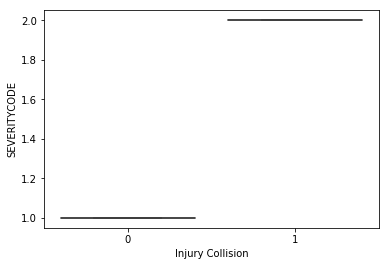

In [56]:
import seaborn as sns
sns.boxplot(x="Injury Collision", y="SEVERITYCODE", data=df2)

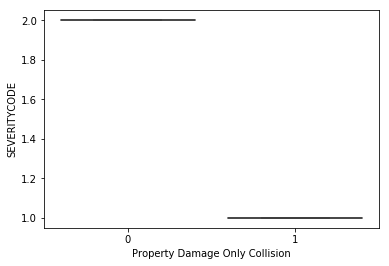

In [57]:
sns.boxplot(x="Property Damage Only Collision", y="SEVERITYCODE", data=df2)

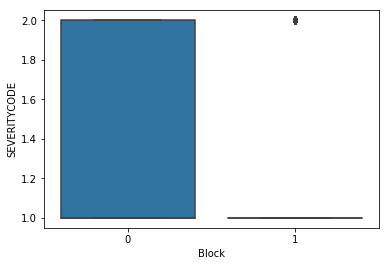

In [58]:
sns.boxplot(x="Block", y="SEVERITYCODE", data=df2)

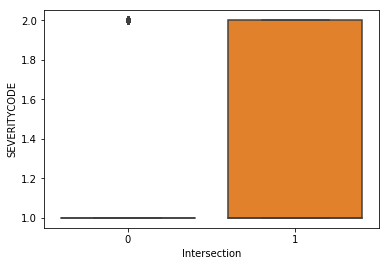

In [59]:
sns.boxplot(x="Intersection", y="SEVERITYCODE", data=df2)

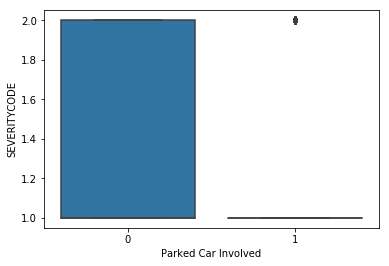

In [60]:
sns.boxplot(x="Parked Car Involved", y="SEVERITYCODE", data=df2)

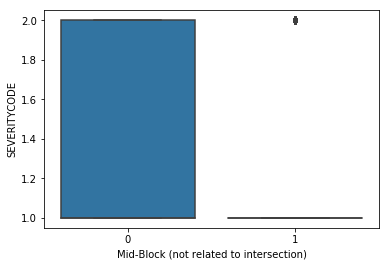

In [61]:
sns.boxplot(x="Mid-Block (not related to intersection)", y="SEVERITYCODE", data=df2) 

## Predictive Modeling

In [62]:
from sklearn.model_selection import train_test_split

X = np.asarray(df2[['UNDERINFL', 'Injury Collision',
       'Property Damage Only Collision', 'Alley', 'Block', 'Intersection',
       'Angles Collision', 'Head On Collision', 'Left Turn Collision',
       'Parked Car Involved', 'Car Rear Ended', 'Right Turn Collision',
       'Sideswipe Collision',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Raining', 'Sleet/Hail/Freezing Rain',
       'Snowing', 'Dry Road', 'Icy Road', 'Snow/Slush Road', 'Standing Water',
       'Wet Road', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']])
print(X[0:1])
y = np.asarray(df2[['SEVERITYCODE']])
print(y[0:2])

[[0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]]
[[2]
 [1]]


In [63]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 36) (155738, 1)
Test set: (38935, 36) (38935, 1)


### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/Users/williamcornejo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
yhat = LR.predict(X_test)
print(yhat)

[2 1 1 ... 1 1 2]


In [66]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.01512635, 0.98487365],
       [0.99347898, 0.00652102],
       [0.9973956 , 0.0026044 ],
       ...,
       [0.99464215, 0.00535785],
       [0.99725739, 0.00274261],
       [0.01014227, 0.98985773]])

In [67]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

In [68]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.006293955196959886

### SVM

In [69]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/Users/williamcornejo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
yhat2 = clf.predict(X_test)
yhat2 [0:5]

array([2, 1, 1, 2, 2])

In [71]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat2, average='weighted') 


1.0

In [74]:
jaccard_similarity_score(y_test, yhat2)

1.0